In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("wine.csv")

In [4]:
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.head()

,class_label,class_name,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280,proline
0,1,Barolo,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,Barolo,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,Barolo,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,Barolo,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,Barolo,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
X = df.drop(['class_label','class_name'],axis =1)
y = df['class_label']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
m1 = DecisionTreeClassifier(criterion='entropy',random_state=0)

In [11]:
m1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [12]:
pred = m1.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [14]:
print(confusion_matrix(pred,y_test))

[[19  2  0]
 [ 1 18  4]
 [ 0  0 10]]


In [15]:
accuracy_score(pred,y_test)

0.8703703703703703

In [16]:
d1 = pd.DataFrame(m1.feature_importances_,columns =['Imp'],index = X_train.columns)

In [17]:
d1

,Imp
alcohol,0.000000
malic_acid,0.024662
ash,0.000000
alcalinity_of_ash,0.000000
magnesium,0.000000
total_phenols,0.000000
flavanoids,0.433706
nonflavanoid_phenols,0.000000
proanthocyanins,0.000000
color_intensity,0.237675


In [18]:
from sklearn.model_selection import GridSearchCV
param = {'max_depth':np.arange(1,10)}
gd = GridSearchCV(m1,param,cv =3)
gd.fit(X,y)

c:\users\indu0\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
gd.best_params_

{'max_depth': 4}

In [20]:
m2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
m2.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [21]:
pred1 = m2.predict(X_test)

In [22]:
print(confusion_matrix(pred1,y_test))

[[19  2  0]
 [ 1 18  4]
 [ 0  0 10]]


In [23]:
accuracy_score(pred1,y_test)

0.8703703703703703

In [24]:
m3 = RandomForestClassifier(n_estimators=51,criterion='entropy',max_depth=4,random_state=0)
m3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=51, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [25]:
pred2 = m3.predict(X_test)

In [26]:
models = []
models.append(('DecisionTree',m1))
models.append(('DTree_Regularized',m2))
models.append(('DTree_RandomForest',m3))

In [27]:
from sklearn import model_selection

In [28]:
from sklearn.model_selection import KFold,cross_val_score

kf = KFold(n_splits=6,shuffle=True,random_state=2)
acc =[] #Bias error is 1 - accuracy score 
results =[]
names =[]
scoring = 'accuracy'

for name,model in models:
    kfold = model_selection.KFold(n_splits=5,random_state=2)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring =scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.var())
    print(msg)

DecisionTree: 0.881905 (0.002315)
DTree_Regularized: 0.881905 (0.002315)
DTree_RandomForest: 0.910476 (0.002931)


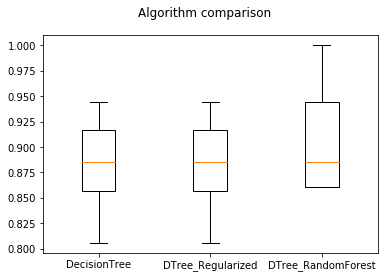

In [29]:
#Box plot

fig = plt.figure()
fig.suptitle('Algorithm comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
from IPython.display import Image
from sklearn import tree
from os import system

train_char_label =['1','2','3']
wine_tree_file = open('wine_tree.dot','w')

dot_data = tree.export_graphviz(m2,out_file= wine_tree_file,
                               feature_names = list(X_train),
                               class_names = list(train_char_label))

wine_tree_file.close()

In [31]:
#open the dot file and open webgraphviz 
#copy the code from the file and paste in the cell and generate graph